In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from numpy import linalg as LA

# Step 2

In [2]:
# Loading Normalized log-scaled standard-deviation sorted dataframe
df = pd.read_csv('../DataSource/SRP158491_normalized_logscaled_std_sorted.csv', index_col=0)

In [3]:
df

,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,ZNG1F,...,GNG12-AS1,IGHV3-43,MYADM-AS2,ALDH1A3,NDUFV1-DT,ASCL5,KCNJ12,SPRR4,HSD17B3-AS1,LOC114841035
refinebio_accession_code,,,,,,,,,,,,,,,,,,,,,
SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,1.317763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,1.150113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7726017,7.544641,0.000000,0.000000,2.802657,6.284985,0.000000,5.020313,0.000000,0.000000,6.025033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7726018,0.000000,7.209779,8.373188,8.040202,6.365506,3.723847,0.711232,4.589354,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR7726019,0.000000,7.250339,8.480368,8.137742,0.000000,7.954921,1.351413,8.330927,1.752926,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Getting top 5000 genes in terms of log-scaled standard deviation
df_5000 = df.iloc[:, :5000]

In [6]:
df_5000

,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,ZNG1F,...,PRPSAP2,CCBE1,CADM4,ZNF80,OR6F1,OGFOD2,OR10J5,SYNPO2,OR5D18,SFN
refinebio_accession_code,,,,,,,,,,,,,,,,,,,,,
SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,0.000000,...,4.139409,0.000000,0.000000,3.554524,0.000000,2.701179,1.970822,0.000000,1.728541,2.799805
SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,0.000000,...,4.102051,0.732929,1.672350,3.789780,0.000000,1.445388,1.151310,0.000000,0.000000,3.018521
SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,1.317763,...,4.728602,0.000000,0.000000,3.738285,1.867194,3.344647,0.000000,0.000000,2.686165,2.479913
SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,0.000000,...,4.711437,0.000000,0.914725,3.723145,0.000000,2.439963,0.000000,0.000000,0.000000,1.384337
SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,1.150113,...,4.811843,0.000000,0.732019,3.539727,0.000000,2.011650,0.000000,0.732019,1.444050,2.265319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7726017,7.544641,0.000000,0.000000,2.802657,6.284985,0.000000,5.020313,0.000000,0.000000,6.025033,...,5.710154,1.463011,2.033121,3.316058,0.000000,2.393963,0.000000,1.167089,0.000000,1.167089
SRR7726018,0.000000,7.209779,8.373188,8.040202,6.365506,3.723847,0.711232,4.589354,0.000000,0.000000,...,6.054355,0.000000,1.122653,4.717653,0.000000,1.976715,0.000000,0.000000,1.122653,1.413300
SRR7726019,0.000000,7.250339,8.480368,8.137742,0.000000,7.954921,1.351413,8.330927,1.752926,0.000000,...,5.251772,0.000000,0.000000,5.009766,0.000000,1.351413,0.000000,0.000000,1.351413,1.905944


In [8]:
test = df_5000.to_numpy()

In [11]:
clustering = AgglomerativeClustering().fit(df_5000)

In [12]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
### Writing method to calculate inertia of clustering since AgglomerativeClustering doesn't come with it
### If you're gonna use KMeans it should already have that built in
def calculate_inertia(df, clustering):
    positions = df.to_numpy()
    index_map = {}
    for i in range(len(np.unique(clustering))):
        index_map[i] = []
    for i in range(len(clustering)):
        index_map[clustering[i]].append(i)
    position_means = []
    for i in range(len(np.unique(clustering))):
        position_means.append(np.mean(positions[index_map[i]], axis=0))
    inertia = 0
    for i in range(len(clustering)):
        inertia += LA.norm(position_means[clustering[i]] - positions[i])**2
    return inertia/(len(clustering) - len(np.unique(clustering)))

In [38]:
lol = calculate_inertia(df_5000, clustering.labels_)

In [45]:
def clustering_pipeline():
    inertias = []
    for i in range(2, 110):
        clustering = AgglomerativeClustering(n_clusters=i).fit(df_5000)
        inertias.append(calculate_inertia(df_5000, clustering.labels_))
    xlabels = np.arange(2, 110)
    plt.plot(xlabels, inertias)

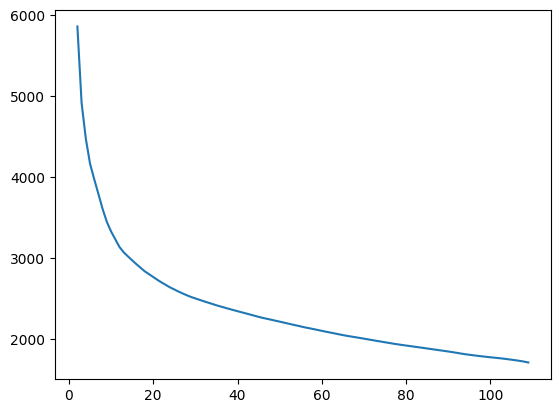

In [46]:
clustering_pipeline()

In [52]:
clustering = AgglomerativeClustering(n_clusters=15).fit(df_5000)

In [58]:
# 15 clusters probably optimal because 
# it's around 10% of the number of data points, and is near the elbow of the inertia plot